**The Fringes of Fitness - 2019 Open Scores**

M.K. - Project - BrainStation 

**EDA, data-wrangling steps:**

-	load packages,
-	load data,
-	check if all the columns we expect to see are present,
-	remove NaNs,
-	verify data types, 
-	check for duplicates,
-	visualize the findings,
-	save and create a .csv file for further processing.
    

In [1]:
# packages 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # plotting
import seaborn as sns
import re


We will work from the Google Drive - if you work from the local machine, you may want to adjust the below commands to let the datasets load from your local drive.

In [2]:
# mount google drive and load data 

from google.colab import drive
drive.mount('/content/drive')

df_2019_opens_scores = pd.read_csv(r"/content/drive/MyDrive/The_Fringes_of_Fitness/CrossFit_Data_Sets_2019_2020/2019_opens_scores.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# EDA and Data Wrangling

Let's see what the data set we deal with looks like.

In [3]:
df_2019_opens_scores

,affiliate,breakdown,competitorid,division,is_scaled,judge,ordinal,rank,scaled,score,scoredisplay,scoreidentifier,time
0,CrossFit RDU,9 rounds +\n10 wall-ball shots\n,96511,Men (45-49),0,Erin Miller,1,1,0,13520000,352 reps,27f30f9a8c0a564ae799,NaN
1,CrossFit RDU,Within 16 minutes:\n3 rounds +\n25 toes-to-bar...,96511,Men (45-49),0,Harper Thorsen,2,4,0,13420368,342 reps,0ed3d1264f25a8f1890d,NaN
2,CrossFit RDU,200-ft. OH lunge\n50 box step-ups\n50 strict H...,96511,Men (45-49),0,Harper Thorsen,3,1,0,11800018,9:42,f2a143399a330c95321b,582.0
3,CrossFit RDU,132 reps\n6 rounds,96511,Men (45-49),0,Harper Thorsen,4,36,0,11320009,11:51,89101e401c6c85997363,711.0
4,CrossFit RDU,210 reps,96511,Men (45-49),0,Harper Thorsen,5,1,0,12100573,10:27,f7588c9174f1fe90f5c4,627.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2863260,CrossFit Saguaro,2 rounds +\n19 wall-ball shots\n,1558594,Men (55-59),1,Soke,1,577,1,950000,95 reps - s,85dda7027de7fa423528,NaN
2863261,NaN,NaN,1558594,Men (55-59),1,NaN,2,577,0,0,NaN,NaN,NaN
2863262,NaN,NaN,1558594,Men (55-59),1,NaN,3,538,0,0,NaN,NaN,NaN
2863263,NaN,NaN,1558594,Men (55-59),1,NaN,4,520,0,0,NaN,NaN,NaN


Let's check for duplicates - none!


In [4]:
# show a sum of duplicated values 

df_2019_opens_scores.duplicated(keep=False).sum()

0

Below, check if the info of the dataset and the data types. The data set contains 2,863,265 rows - quite impressive, isn't it? 


In [5]:
df_2019_opens_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2863265 entries, 0 to 2863264
Data columns (total 13 columns):
 #   Column           Dtype  
---  ------           -----  
 0   affiliate        object 
 1   breakdown        object 
 2   competitorid     int64  
 3   division         object 
 4   is_scaled        int64  
 5   judge            object 
 6   ordinal          int64  
 7   rank             int64  
 8   scaled           int64  
 9   score            int64  
 10  scoredisplay     object 
 11  scoreidentifier  object 
 12  time             float64
dtypes: float64(1), int64(6), object(6)
memory usage: 284.0+ MB


The below schema will be used to ensure that all the columns that we expect to have are indeed present.

In [6]:
# expected schema - df_2019_opens_scores

schema_exp_df_2019_opens_scores = {'ordinal': np.int64, 'breakdown': object,
                                  'rank': np.int64,
                                  'scoredisplay': np.int64,
                                  'time': np.int64,
                                  'rank': np.int64,
                                  'competitorid': np.int64,
                                  'scoreidentifier': object,
                                  'is_scaled': np.int64,
                                  'affiliate': object,
                                  'division': object,
                                  'judge': object,
                                  'score': np.int64}

Create a function to run the check of the schema.

In [7]:
# check columns

def schema_checker(df_2019_opens_scores, schema_exp_df_2019_opens_scores):
    for i in schema_exp_df_2019_opens_scores:
        if i not in df_2019_opens_scores.columns:
            print(f'"{i}" not found in dataset.')
            
        else:
            print(f'"{i}" is found.')

Print the result of the check and see if any discrepancies are discovered. 

In [8]:
print(schema_checker(df_2019_opens_scores, schema_exp_df_2019_opens_scores))

"ordinal" is found.
"breakdown" is found.
"rank" is found.
"scoredisplay" is found.
"time" is found.
"competitorid" is found.
"scoreidentifier" is found.
"is_scaled" is found.
"affiliate" is found.
"division" is found.
"judge" is found.
"score" is found.
None


Create a visual to check for the missing values - they are present in many columns - 'affiliate', 'breakdown', 'judge', 'scoredisplay', 'scoreidentifier', 'time'.

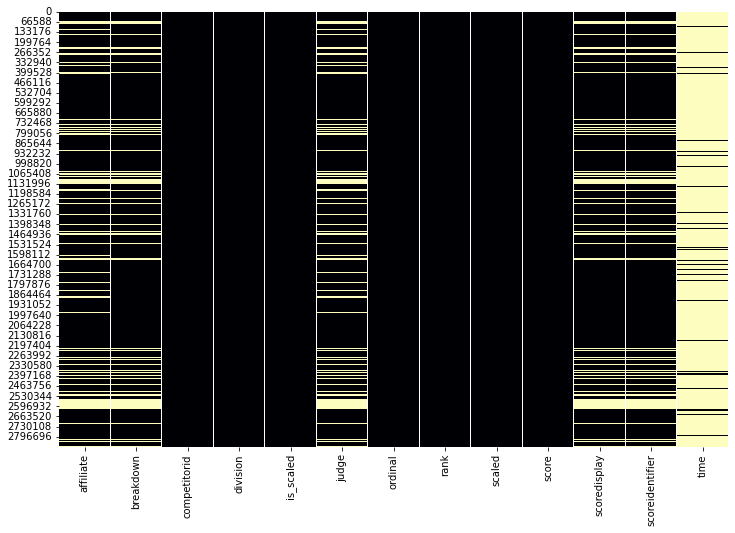

In [9]:
# plot the missing data points - the black indicates the presence of the values, yellow - their absence.

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df_2019_opens_scores.isnull(), cbar=False, cmap="magma")
plt.show()

Let's create a function that formally checks for NaNs in the data set.

In [10]:
# check nans

def nan_checker(df_2019_opens_scores): 

    summary = {}
    # are there any nan values?
    any_nans = df_2019_opens_scores.isna().any().any()
    
    summary['NaNs Exist'] = any_nans
    
    # how many?
    n_nans = df_2019_opens_scores.isna().sum().sum()
    summary['NaN Count'] = n_nans
    
    # which variables do they come from
    nan_column_series = df_2019_opens_scores.isna().sum()
    nan_column_names = list(nan_column_series[nan_column_series > 0].index)
    
    summary['NaN Containing Columns'] = nan_column_names
    
    
    # any variables with more than 50% of data missing?
    nan_column_percent = 100 * nan_column_series/df_2019_opens_scores.shape[0]
    nan_columns_with_more_than_50_pct = list(nan_column_percent[nan_column_percent > 50].index)
    
    summary['NaNs More Than 50%'] = nan_columns_with_more_than_50_pct
    
    
    
    #summary can be all the info about nans
    return(summary)

Print out the name of the columns in which the NaNs are present and count their numbers.

In [11]:
print(nan_checker(df_2019_opens_scores))

{'NaNs Exist': True, 'NaN Count': 5479920, 'NaN Containing Columns': ['affiliate', 'breakdown', 'judge', 'scoredisplay', 'scoreidentifier', 'time'], 'NaNs More Than 50%': ['time']}


Let's deal with NaNs:
 - add 'None' to the cells with missing values - 'affiliate', 'breakdown',  'judge', 'scoreidentifier' - the absence of this information is not making us lose any value,
 - replace the missing time with 0 - it is not a timed discipline.

In [12]:
# fill in the missing values with none where we have no opportunity to impute any meaningful data 

df_2019_opens_scores[['affiliate', 'breakdown', 'judge', 'scoreidentifier' ]] = df_2019_opens_scores[['affiliate', 'breakdown', 'judge', 'scoreidentifier']].fillna('None') # filling the missing NaNs 

Check what columns still contain missing values - scoredisplay and time.

In [13]:
print(nan_checker(df_2019_opens_scores)) # all NaNs have been thus cleansed 

{'NaNs Exist': True, 'NaN Count': 3202191, 'NaN Containing Columns': ['scoredisplay', 'time'], 'NaNs More Than 50%': ['time']}


Fill in the time with 0.

In [14]:
# replace NaNs with zeros - the rest is the time in seconds 

df_2019_opens_scores['time'] = df_2019_opens_scores['time'].fillna(0)

Check what remains with missing values - scoredisplay. 

In [15]:
print(nan_checker(df_2019_opens_scores)) 

{'NaNs Exist': True, 'NaN Count': 533747, 'NaN Containing Columns': ['scoredisplay'], 'NaNs More Than 50%': []}


Let's remove different words and non-int formats in the cells in the column 'scoredisplay'. 

In [16]:
# eliminate time and other items that don't belong from the scoredisplay column

df_2019_opens_scores['scoredisplay']  = df_2019_opens_scores['scoredisplay'].str.replace(r"^(([0-1]?[0-9])|([2][0-3])):([0-5]?[0-9])(:([0-5]?[0-9]))?$",'0')
df_2019_opens_scores['scoredisplay']  = df_2019_opens_scores['scoredisplay'].str.replace(" - s",'')
df_2019_opens_scores['scoredisplay']  = df_2019_opens_scores['scoredisplay'].str.replace(r"^(([0-1]?[0-9])|([2][0-3])):([0-5]?[0-9][0-9])(:([0-5]?[0-9]))?$",'0')
df_2019_opens_scores['scoredisplay']  = df_2019_opens_scores['scoredisplay'].str.replace(" reps0",'')
df_2019_opens_scores['scoredisplay']  = df_2019_opens_scores['scoredisplay'].str.replace(" reps",'')

Replace the missing values in that column with 0 because it is not supposed to contain a value at all - it must be a timed discipline. 

In [17]:
# eliminate nans

df_2019_opens_scores['scoredisplay'] = df_2019_opens_scores['scoredisplay'].fillna(0)

Check if any missing values remain - none!

In [18]:
print(nan_checker(df_2019_opens_scores)) # all nans are gone - bye honey!

{'NaNs Exist': False, 'NaN Count': 0, 'NaN Containing Columns': [], 'NaNs More Than 50%': []}


Let's reset the index to make sure that all the lines are in good order. 

In [19]:
# reset index 

df_2019_opens_scores = df_2019_opens_scores.reset_index(drop=True) 

Create a data-type checker function.

In [20]:
# checker of data types in columns

def dtype_checker(df_2019_opens_scores, schema_exp_df_2019_opens_scores):
    for column,dtype in schema_exp_df_2019_opens_scores.items():
        if column in df_2019_opens_scores.columns:
            if df_2019_opens_scores[column].dtype != dtype:
                print(f'"{column}" does not match dtype "{dtype}"')
           # column doesn't match the expected data type
        else:
            print(f'{column} matches the expected data type.')

Some data types mismatch - scoredisplay and time. 

In [21]:
# the mistmatched datatypes after the first iteration - that indicates that some data points are not homogenic 

dtype_checker(df_2019_opens_scores, schema_exp_df_2019_opens_scores)

"scoredisplay" does not match dtype "<class 'numpy.int64'>"
"time" does not match dtype "<class 'numpy.int64'>"


Let's correct the data type for scoredisplay - it should be integer.

In [22]:
# fix scoreplay data type

df_2019_opens_scores['scoredisplay'] = pd.Series(df_2019_opens_scores['scoredisplay'], dtype="int64") #successful


Let's correct the data type for time - it should be integer.

In [23]:
# fix time data type

df_2019_opens_scores['time'] = pd.Series(df_2019_opens_scores['time'], dtype="int64")#successful


## Univariate analysis 

To perform the analysis, let's identify the columns that contain numerical and categorical variables.

In [24]:
# variables 

variables_check = ['affiliate',
                   'breakdown',
                   'competitorid',
                   'division',
                   'is_scaled',
                   'judge',
                   'ordinal',
                   'rank',
                   'scaled',
                   'score',
                   'scoredisplay',
                   'scoreidentifier',
                   'time']


Earlier, we decided that we will only analyze the men and women divisions. To achieve this goal, we shall create a data frame containing only these two divisions.

In [25]:
# create a df containing the data for the two largest divisions

df_2019_opens_scores_men_women = df_2019_opens_scores[(df_2019_opens_scores['division'] == 'Men') | (df_2019_opens_scores['division'] == 'Women')]


Let's examine how the newly created data frame looks like.

In [26]:
df_2019_opens_scores_men_women

,affiliate,breakdown,competitorid,division,is_scaled,judge,ordinal,rank,scaled,score,scoredisplay,scoreidentifier,time
403955,CrossFit Bath,9 rounds +\n8 wall-ball shots\n,8859,Women,0,Karin Seelow,1,6,0,13500000,350,a93afedad2708c2b22ef,0
403956,CrossFit Alioth,430 reps\n5 rounds,8859,Women,0,Mikko Aronpää,2,5,0,14300280,0,df5e466fa8e5a87dc349,920
403957,CrossFit Alioth,200-ft. OH lunge\n50 box step-ups\n50 strict H...,8859,Women,0,Mikko Aronpää,3,2,0,11800181,0,1191a6d39e26cf30f043,419
403958,CrossFit Alioth,132 reps\n6 rounds,8859,Women,0,Mikko Aronpää,4,23,0,11320149,0,52327acbcd1d14e67a63,571
403959,Tagoror CrossFit,210 reps,8859,Women,0,Phil Mansfield,5,4,0,12100741,0,fc05b31d2ee63f2531b0,459
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2689905,Grandstand CrossFit,+\n1 wall-ball shot\n,1605642,Men,1,Diana Vieweg,1,12614,1,10000,1,d2926294a68a855c7fd7,0
2689906,None,None,1605642,Men,1,None,2,12160,0,0,0,None,0
2689907,None,None,1605642,Men,1,None,3,10911,0,0,0,None,0
2689908,None,None,1605642,Men,1,None,4,10527,0,0,0,None,0


Let's review the distribution of 'score' among men and women. From the visual examination below, it becomes evident that the column has no meaning, and the data in it is corrupt. We shall discard it, as we cannot identify ways to correct it. Thankfully, we seem not to need that data because we shall not use the data that we don't have before the competition begins, and the score seems to not pass this test (as it is unavailable before the competition begins - and cannot be used for our business case). We would not be able to build a working model based on such a piece of data.

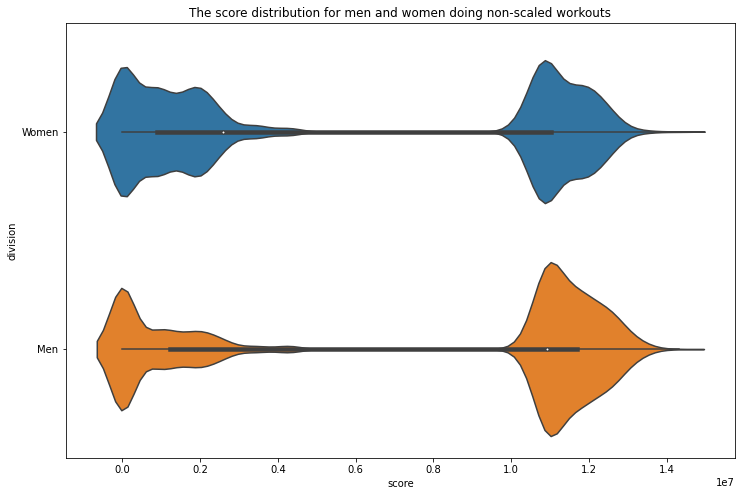

In [27]:
# plot affiliate for men and women - non-scaled 

col_val_counts = df_2019_opens_scores_men_women[df_2019_opens_scores_men_women['is_scaled'] == 0]['score'].value_counts()
    
plt.figure(figsize=(12,8))
sns.violinplot(y='division', x='score', data=df_2019_opens_scores_men_women, orient='h', scale='count', trim=True)
plt.ylabel("division")
plt.title('The score distribution for men and women doing non-scaled workouts')
plt.show() 

Let's analyze the distribution of the scoredisplay column. The only thing we can tell from this distribution is that the shape of the distribution is similar for men and women. The rest - such as the predictive power that we might extract from this data - we wouldn't be able to judge in advance of modeling. 

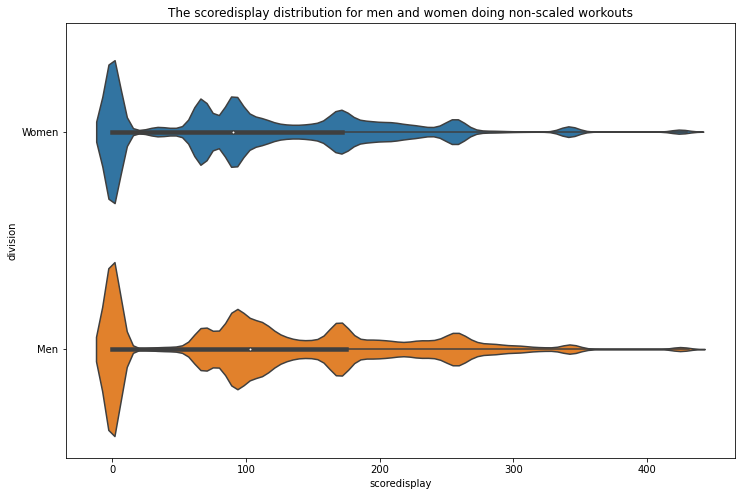

In [28]:
# plot scoredisplay for men and women - non-scaled 

col_val_counts = df_2019_opens_scores_men_women[df_2019_opens_scores_men_women['is_scaled'] == 0]['scoredisplay'].value_counts()
    
plt.figure(figsize=(12,8))
sns.violinplot(y='division', x='scoredisplay', data=df_2019_opens_scores_men_women, orient='h', scale='count', trim=True)
plt.ylabel("division")
plt.title('The scoredisplay distribution for men and women doing non-scaled workouts')
plt.show()

The distribution of time also seems to be similar for men and women, but there is very little variance in this data, so it might potentially cause problems to modeling. We will know this later when we begin the modeling stage. 

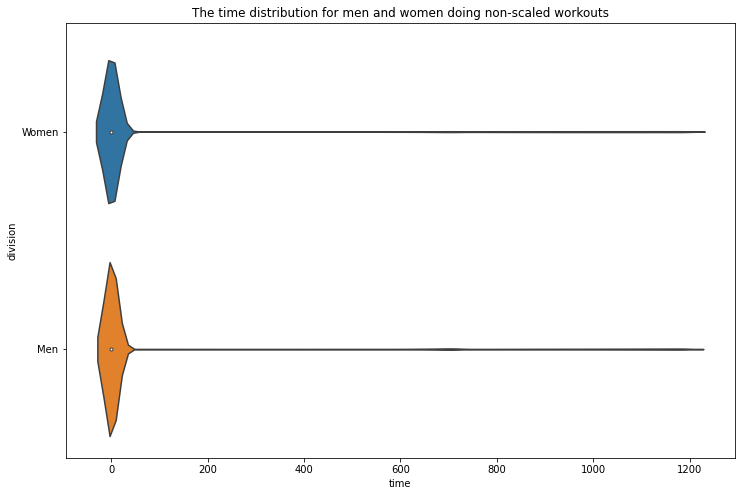

In [29]:
# plot time for men and women

col_val_counts = df_2019_opens_scores_men_women[df_2019_opens_scores_men_women['is_scaled'] == 0]['time'].value_counts()
    
plt.figure(figsize=(12,8))
sns.violinplot(y='division', x='time', data=df_2019_opens_scores_men_women, orient='h', scale='count', trim=True)
plt.ylabel("division")
plt.title('The time distribution for men and women doing non-scaled workouts')
plt.show()

The distribution of ranks across the disciplines shows only that many competitors do not make it through till the end of the open competition - many drop out. As it is seen in the visual below, the distribution of ranks among the of the competitors naturally shrinks as the number of competitors becomes smaller. There is little use in this info, but we could use the 2019 data as a predictor of the athletes' performance in the future years and for feature engineering, potentially.

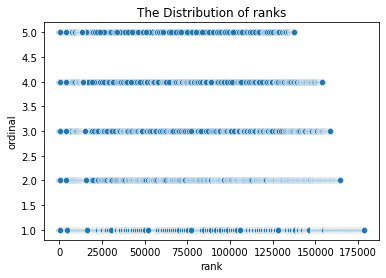

In [30]:
sns.scatterplot(data = df_2019_opens_scores, x = "rank", y = "ordinal").set_title('The Distribution of ranks')
plt.show()

Let's save the data.

At this point, we have retained most of the data and only discarded a few columns - not all of the data will be used in the future for modeling. But we are hesitant to drop columns, just in case we need to analyze them further and potentially use them in any feature engineering.

In [31]:
# examine the df

df_2019_opens_scores

,affiliate,breakdown,competitorid,division,is_scaled,judge,ordinal,rank,scaled,score,scoredisplay,scoreidentifier,time
0,CrossFit RDU,9 rounds +\n10 wall-ball shots\n,96511,Men (45-49),0,Erin Miller,1,1,0,13520000,352,27f30f9a8c0a564ae799,0
1,CrossFit RDU,Within 16 minutes:\n3 rounds +\n25 toes-to-bar...,96511,Men (45-49),0,Harper Thorsen,2,4,0,13420368,342,0ed3d1264f25a8f1890d,0
2,CrossFit RDU,200-ft. OH lunge\n50 box step-ups\n50 strict H...,96511,Men (45-49),0,Harper Thorsen,3,1,0,11800018,0,f2a143399a330c95321b,582
3,CrossFit RDU,132 reps\n6 rounds,96511,Men (45-49),0,Harper Thorsen,4,36,0,11320009,0,89101e401c6c85997363,711
4,CrossFit RDU,210 reps,96511,Men (45-49),0,Harper Thorsen,5,1,0,12100573,0,f7588c9174f1fe90f5c4,627
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2863260,CrossFit Saguaro,2 rounds +\n19 wall-ball shots\n,1558594,Men (55-59),1,Soke,1,577,1,950000,95,85dda7027de7fa423528,0
2863261,None,None,1558594,Men (55-59),1,None,2,577,0,0,0,None,0
2863262,None,None,1558594,Men (55-59),1,None,3,538,0,0,0,None,0
2863263,None,None,1558594,Men (55-59),1,None,4,520,0,0,0,None,0


In [32]:
# df_2019_opens_scores.to_csv('df_2019_opens_scores_final.csv', index=False)